In [118]:
import numpy as np
import jax
import jax.numpy as jnp

import sys
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import importlib

def append_path(path):
    if path not in sys.path:
        sys.path.append(path)
        
append_path(os.path.abspath(os.path.join('..', '00_utils_training')))

import optimize_pyomo_synthetic
from optimize_pyomo_synthetic import reload_and_get_attribute

In [119]:
Runner = reload_and_get_attribute(optimize_pyomo_synthetic, 'ExperimentRunner')
runner = Runner('config.json')
runner.run('default')

/Users/mariiashapo/Library/CloudStorage/OneDrive-Personal/project_2324/NODE/00_utils/non_parametric_collocation.py:95: UserWarning: Data transposed to match expected dimensions.
  warnings.warn("Data transposed to match expected dimensions.")


current_16_08


/Users/mariiashapo/Library/CloudStorage/OneDrive-Personal/project_2324/NODE/00_models/nn_pyomo_base.py:86: UserWarning: y_init should be structured such that each row represents a new time point.
  warnings.warn("y_init should be structured such that each row represents a new time point.")


Ipopt 3.14.16: tol=1e-08
print_level=1
max_iter=3000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

{'solver_time': 4.332602262496948, 'termination_condition': <TerminationCondition.optimal: 'optimal'>, 'message': 'Ipopt 3.14.16\\x3a Optimal Solution Found'}
Iteration: 1 / 1


({None: {'time_elapsed': 4.332602262496948,
   'mse_train': Array(0.01938485, dtype=float64),
   'mse_test': Array(0.46753824, dtype=float64),
   'termination': <TerminationCondition.optimal: 'optimal'>}},
 <run_train_toy.TrainerToy at 0x321c50100>)

In [120]:
trainer = runner.trainer
model = runner.trainer.model

In [121]:
y_pred = model.neural_ode(trainer.y[0], trainer.t)
y_pred_test = model.neural_ode(trainer.y_test[0], trainer.t_test)

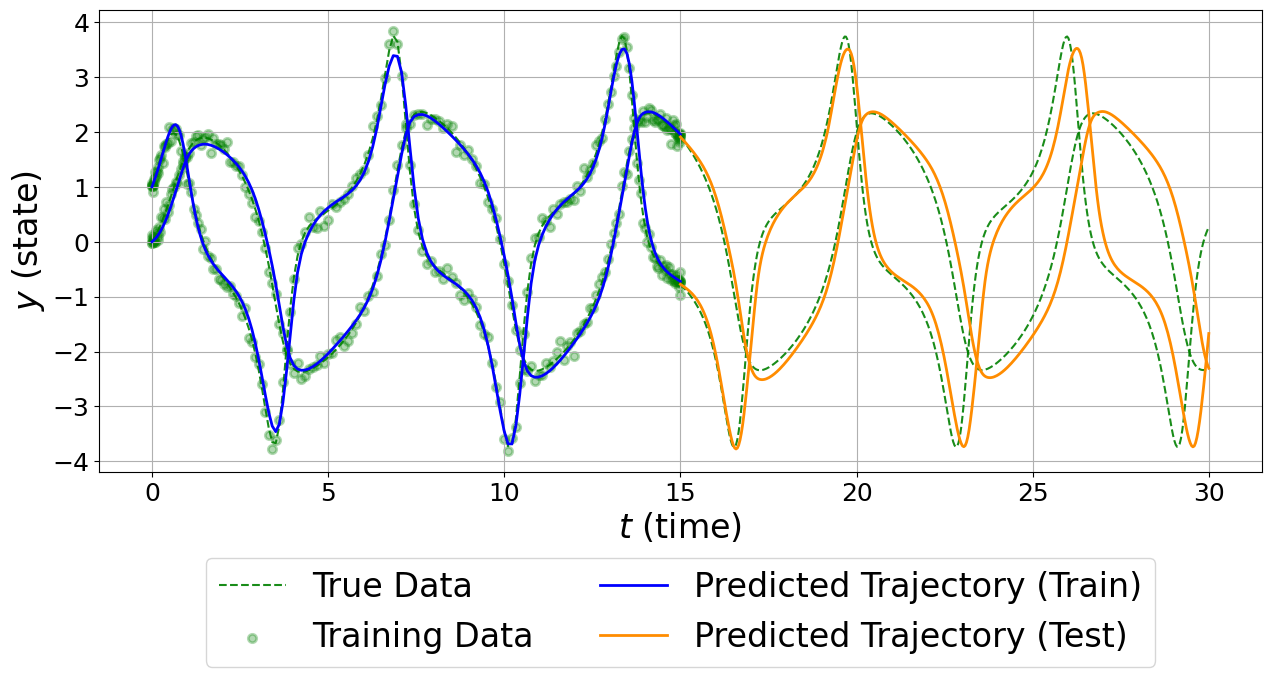

In [123]:
lw = 1.5
alpha = 0.9
alpha_pred = 1
lw_pred = 2
s = 50

plt.figure(figsize=(15, 6))

plt.plot(trainer.t, trainer.y[:,0], color = 'green', label='True Data', alpha = alpha, linewidth=lw, ls = '--') 
plt.plot(trainer.t, trainer.y[:,1], color = 'green', alpha = alpha, linewidth=lw, ls = '--') 
plt.scatter(trainer.t, trainer.y_noisy[:,0], color='green', alpha = 0.3, linewidth=lw_pred, label='Training Data')
plt.scatter(trainer.t, trainer.y_noisy[:,1], color='green', alpha = 0.3, linewidth=lw_pred)
plt.plot(trainer.t_test, trainer.y_test[:,0], color='green', alpha = alpha, linewidth=lw, ls = '--') 
plt.plot(trainer.t_test, trainer.y_test[:,1], color='green', alpha = alpha, linewidth=lw, ls = '--') 

plt.plot(trainer.t, y_pred[:,0], color = 'blue', label='Predicted Trajectory (Train)', alpha = alpha_pred, linewidth=lw_pred)
plt.plot(trainer.t, y_pred[:,1], color = 'blue', alpha = alpha_pred, linewidth=lw_pred)

plt.plot(trainer.t_test, y_pred_test[:,0], color='#FF8C00', label='Predicted Trajectory (Test)', alpha = alpha_pred, linewidth=lw_pred)
plt.plot(trainer.t_test, y_pred_test[:,1], color='#FF8C00', alpha = alpha_pred, linewidth=lw_pred)

#plt.title(f"Collocation-based neural ODE training (Damped Oscillator)")
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel("$t$ (time)", fontsize=24)
plt.ylabel("$y$ (state)", fontsize=24)
plt.grid(True)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=2, fontsize=24)
plt.show()